In [19]:
import pandas as pd
import numpy as np
import gzip # This is used in extracting the images

import seaborn as sns
import matplotlib.pyplot as plt # In order to plot the images to see what we are dealing with

from sklearn.ensemble import RandomForestClassifier # You'll be using Random Forest to classify the images
from sklearn.metrics import accuracy_score # Sklearn's way of measuring accuracy
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
def extract_data(filename, num_images, IMAGE_WIDTH):
    """Extract the images into a 4D tensor [image index, y, x, channels]."""
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(IMAGE_WIDTH * IMAGE_WIDTH * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, IMAGE_WIDTH*IMAGE_WIDTH)
        return data

def extract_labels(filename, num_images):
    """Extract the labels into a vector of int64 label IDs."""
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [8]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_df.isnull().sum().unique() # verify if there is null values 

array([0])

In [17]:
def print_label(row):
    
    # give the row index 
    # the number appears to verify it with label
    
    pixels = train_df.loc[row].drop('label').values

    pixels = pixels.reshape(28, 28)

    plt.imshow(pixels, cmap='gray')
    plt.axis("off")
    plt.show()

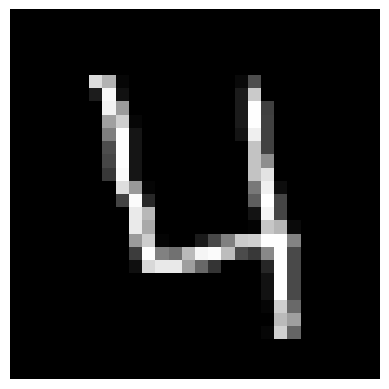

4

In [24]:
print_label(3)
train_df.label.loc[3]

In [25]:
X = train_df.drop("label", axis=1) / 255.0
y = train_df["label"]

test_df = test_df  / 255.0

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.9629761904761904

In [34]:
test_pred = clf.predict(test_df)

In [38]:
submission = pd.DataFrame({
    "ImageId" : range(1, len(test_pred)+1),
    "Label" : test_pred
})

submission.to_csv("submission_digit_rec.csv", index=False)